In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from typing import List
import warnings
warnings.filterwarnings('ignore')


In [21]:
df = pd.read_csv(r"D:\Krish_naik\End_To_End_Student_Marks_prediction\Notebook\data\raw.csv")

In [3]:
X = df.drop(columns=['math_score'], axis=1)

In [4]:
y = df['math_score']

In [5]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

In [6]:
preprocessor = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), num_cols),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [7]:
X = preprocessor.fit_transform(X)


In [8]:
X.shape

(1000, 14)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((800, 14), (200, 14))

In [11]:
def evaluate_model(y_true, y_pred)->List[float]:
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return [mae, rmse, r2]

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_result = evaluate_model(y_train, y_train_pred)
    test_result = evaluate_model(y_test, y_test_pred)
    
    model_list.append(name)
    
    print(f'{name} Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_result[1]))
    print("- Mean Absolute Error: {:.4f}".format(train_result[0]))
    print("- R2 Score: {:.4f}".format(train_result[2]))

    print('----------------------------------')
    
    print(f'{name} Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_result[1]))
    print("- Mean Absolute Error: {:.4f}".format(test_result[0]))
    print("- R2 Score: {:.4f}".format(test_result[2]))
    r2_list.append(test_result[2])
    
    print('='*35)
    print('\n')

Linear Regression Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Linear Regression Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Lasso Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Ridge Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


K-Neighbors Regressor Model performance for Training set
- Root Mean Squared Error: 5.5660
- Mean Absolute Error: 4.4493
- R2 Score: 

In [13]:
list(zip(model_list, r2_list))

[('Linear Regression', 0.8804332983749564),
 ('Lasso', 0.825320079562973),
 ('Ridge', 0.8804513937125636),
 ('K-Neighbors Regressor', 0.7763353420586311),
 ('Decision Tree', 0.7523613206957882),
 ('Random Forest Regressor', 0.848811872455989),
 ('XGBRegressor', 0.8209235882177297),
 ('CatBoosting Regressor', 0.8498011432081655),
 ('AdaBoost Regressor', 0.8475422542445308)]

In [14]:
pd.DataFrame(zip(model_list, r2_list), columns=['model', 'r2']).sort_values(by='r2', ascending=False)

,model,r2
2,Ridge,0.880451
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.849801
5,Random Forest Regressor,0.848812
8,AdaBoost Regressor,0.847542
1,Lasso,0.825320
6,XGBRegressor,0.820924
3,K-Neighbors Regressor,0.776335
4,Decision Tree,0.752361


In [15]:
y_pred = LinearRegression(fit_intercept=True).fit(X_train, y_train).predict(X_test)
r2_score(y_test, y_pred)*100

88.04332983749565

<Axes: xlabel='math_score'>

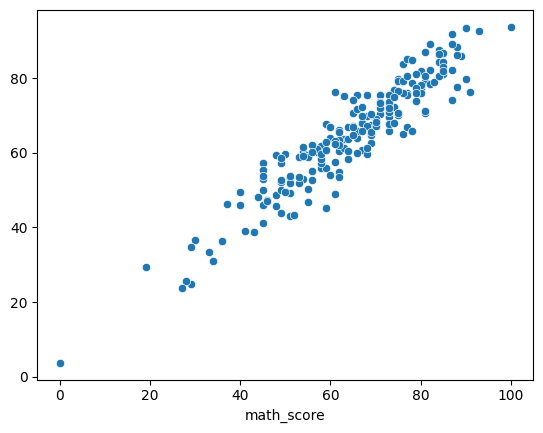

In [16]:
sns.scatterplot(data=None, x=y_test, y=y_pred)

<Axes: xlabel='math_score'>

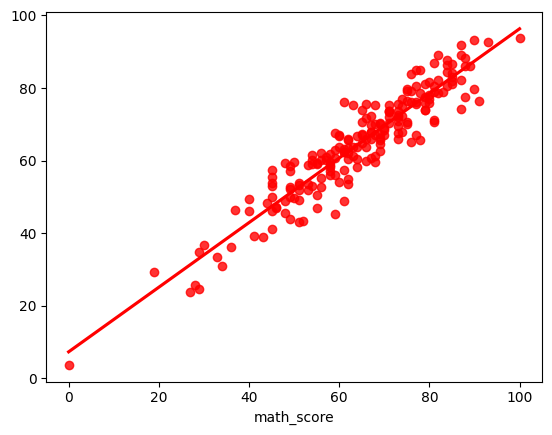

In [18]:
sns.regplot(data=None, x=y_test, y=y_pred, color='r', ci=None)

In [19]:
final_diff = pd.DataFrame({
    'Actual' : y_test,
    'Predict' : y_pred,
    'Diff' : y_test-y_pred
})
final_diff

,Actual,Predict,Diff
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
